In [7]:
import numpy as np
import cv2 as cv

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt 
T = 0.01
k = 0.04

img = cv.imread('new.jpg') #cv.imread('chessboard_img.png')
if img is None:
    print("Error: Could not open or find the image.")
else:
    #  dimensions of the image
    height, width, channels = img.shape

    print(f"Image Width: {width} pixels")
    print(f"Image Height: {height} pixels")
    print(f"Number of Channels (e.g., 3 for RGB): {channels}")
img = cv.resize(img,(600,600))
cv.imshow('img',img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst= cv.cornerHarris(gray,6,7,k)
dst = cv.dilate(dst,None)

img[dst>T* dst.max()] = [0,0,255]

cv.imshow('dst',img)



if(cv.waitKey()==ord('q')):
   cv.destroyAllWindows()

Image Width: 276 pixels
Image Height: 183 pixels
Number of Channels (e.g., 3 for RGB): 3


In [1]:
###########noisy
#### sir modified
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt 
T = 0.001
k = 0.04

img = cv.imread('red.jpg') #cv.imread('chessboard_img.png')
img = cv.resize(img,(600,600))
cv.imshow('INPUT',img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst= cv.cornerHarris(img[:,:,1],5,5,k)
dst = cv.dilate(dst,None)

img[dst>T* dst.max()] = [255,0,0]

cv.imshow('OUTPUT',img)



if(cv.waitKey()==ord('q')):
   cv.destroyAllWindows()

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

T = 0.026
k = 0.04

# Read the image
img = cv.imread('red.jpg')
img = cv.resize(img, (600, 600))
cv.imshow('img', img)

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Separate the RGB channels
b, g, r = cv.split(img)

# Convert each channel to float32
b = np.float32(b)
g = np.float32(g)
r = np.float32(r)

# Apply Sobel operator on each channel
sobel_kernel_size = 3  # You can adjust the kernel size
sobel_b_x = cv.Sobel(b, cv.CV_32F, 1, 0, ksize=sobel_kernel_size)
sobel_g_x = cv.Sobel(g, cv.CV_32F, 1, 0, ksize=sobel_kernel_size)
sobel_r_x = cv.Sobel(r, cv.CV_32F, 1, 0, ksize=sobel_kernel_size)

sobel_b_y = cv.Sobel(b, cv.CV_32F, 0, 1, ksize=sobel_kernel_size)
sobel_g_y = cv.Sobel(g, cv.CV_32F, 0, 1, ksize=sobel_kernel_size)
sobel_r_y = cv.Sobel(r, cv.CV_32F, 0, 1, ksize=sobel_kernel_size)

# Compute the gradient magnitude for each channel
gradient_magnitude_b = np.sqrt(sobel_b_x**2 + sobel_b_y**2)
gradient_magnitude_g = np.sqrt(sobel_g_x**2 + sobel_g_y**2)
gradient_magnitude_r = np.sqrt(sobel_r_x**2 + sobel_r_y**2)

# Combine the gradient magnitudes
gradient_magnitude = (gradient_magnitude_b + gradient_magnitude_g + gradient_magnitude_r) / 3.0

# Threshold to find corners
corners = np.zeros_like(gradient_magnitude)
corners[gradient_magnitude > T * gradient_magnitude.max()] = 255

# Display the result
cv.imshow('Corners', corners.astype(np.uint8))

if cv.waitKey() == ord('q'):
    cv.destroyAllWindows()


In [8]:
###########noisy

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt 
T = 0.026
k = 0.01

img = cv.imread('small2.jpg') #cv.imread('chessboard_img.png')
img = cv.resize(img,(600,600))
cv.imshow('img',img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst= cv.cornerHarris(gray,4,5,k)
dst = cv.dilate(dst,None)

img[dst>T* dst.max()] = [0,0,255]

cv.imshow('dst',img)



if(cv.waitKey()==ord('q')):
   cv.destroyAllWindows()

In [13]:
########################################### Harris Detection ################################################
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def compute_harris_response(image, ksize, k):
    # Compute derivatives using Sobel operator
    sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=ksize)
    sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=ksize)

    # Compute elements of the Harris matrix
    Ixx = sobel_x**2
    Iyy = sobel_y**2
    Ixy = sobel_x * sobel_y

    # Compute the sum of squared gradients in the neighborhood
    Sxx = cv.boxFilter(Ixx, -1, (ksize, ksize))
    Syy = cv.boxFilter(Iyy, -1, (ksize, ksize))
    Sxy = cv.boxFilter(Ixy, -1, (ksize, ksize))

    # Compute the determinant and trace of the Harris matrix
    det_M = (Sxx * Syy) - (Sxy**2)
    trace_M = Sxx + Syy

    # Compute the Harris response
    harris_response = det_M - k * (trace_M**2)

    return harris_response

def detect_corners(image, threshold, ksize, k):
    # Convert RGB image to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Compute Harris response
    harris_response = compute_harris_response(gray, ksize, k)

    # Dilate the response to find local maxima
    harris_response_dilated = cv.dilate(harris_response, None)

    # Mark corners on the original image
    image[harris_response_dilated > threshold * harris_response_dilated.max()] = [0, 0, 255]

    return image

# Parameters
threshold = 0.026
ksize = 3  # Sobel kernel size
k = 0.04    # Harris sensitivity factor

# Load the image
img = cv.imread('red.jpg')

img = cv.resize(img, (600, 600))
cv.imshow('INPUT', img)


# Detect corners manually
result_image = detect_corners(img, threshold, ksize, k)


# Display the result
cv.imshow('Harris Corner Detection', result_image)

# Wait for a key press and then close windows
if cv.waitKey() == ord('q'):
    cv.destroyAllWindows()

    


    


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

T = 0.3
k = 0.04

img = cv.imread('chessboard_img.png')
img = cv.resize(img, (600, 600))
cv.imshow('img', img)


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


mean = 2
variance = 0.06
gaussian_noise = np.random.normal(mean, np.sqrt(variance), gray.shape)
noisy_gray = gray + gaussian_noise.astype(np.uint8)


noisy_gray = np.float32(noisy_gray)


dst = cv.cornerHarris(noisy_gray,2,3, k)
dst = cv.dilate(dst, None)

img[dst > T * dst.max()] = [0, 0, 255]


cv.imshow('dst', img)


image2 = cv.imread('chessboard_img.png')
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')

plt.show()

# Wait for a key press and then close windows
if cv.waitKey() == ord('q'):
    cv.destroyAllWindows()


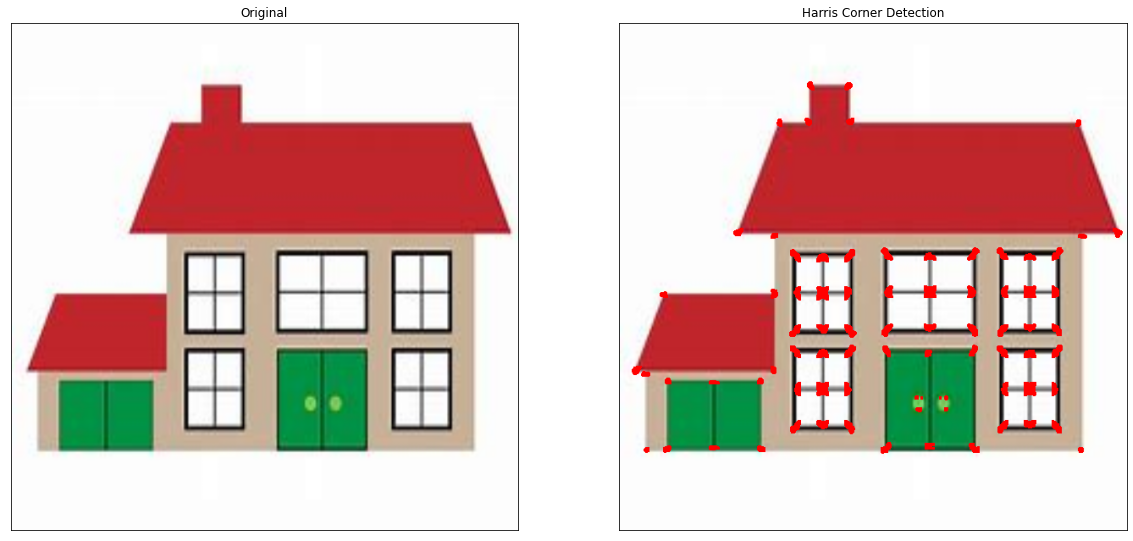

In [28]:
########################################### Harris Detection Assignment ################################################
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def compute_harris_response(image, ksize, k):
    # Compute derivatives using Sobel operator
    sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=ksize)
    sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=ksize)

    # Compute elements of the Harris matrix
    Ixx = sobel_x**2
    Iyy = sobel_y**2
    Ixy = sobel_x * sobel_y

    # Compute the sum of squared gradients in the neighborhood
    Sxx = cv.boxFilter(Ixx, -1, (ksize, ksize))
    Syy = cv.boxFilter(Iyy, -1, (ksize, ksize))
    Sxy = cv.boxFilter(Ixy, -1, (ksize, ksize))

    # Compute the determinant and trace of the Harris matrix
    det_M = (Sxx * Syy) - (Sxy**2)
    trace_M = Sxx + Syy

    # Compute the Harris response
    harris_response = det_M - k * (trace_M**2)

    return harris_response

def detect_corners(image, threshold, ksize, k):
    # Convert RGB image to grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Compute Harris response
    harris_response = compute_harris_response(gray, ksize, k)

    # Dilate the response to find local maxima
    harris_response_dilated = cv.dilate(harris_response, None)

    # Mark corners on the original image
    image[harris_response_dilated > threshold * harris_response_dilated.max()] = [255, 0, 0]

    return image

# Parameters
threshold = 0.001
ksize = 5  # Sobel kernel size
k = 0.04    # Harris sensitivity factor

# Load the image
img = cv.imread('red.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (600, 600))

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

# Detect corners manually
result_image = detect_corners(img, threshold, ksize, k)


plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title('Harris Corner Detection')

plt.xticks([])
plt.yticks([])
plt.show()

